In [4]:
# Import all of the requried libraries
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd
# import statistics
from statistics import mode,mean
from scipy import interpolate
import os

# These are all of the libraries that I manually created
import IOfunctions as IO
import GUIfunctions as GUI
import Processfunctions as process

#
# Through Thorlabs
#
# start_index = 32  # Start index 32 is the full spectrum (from 195nm)
# start_index = 774 # starts at 350nm
#
# Through 3D slicer
#
# start_index = 0 # starts at 195nm
# start_index = 742 # starts at 350nm
start_index = 790 # starts at 360nm



### Data Loading and Formatting 
#### Load in (IO)
* Load in the raw data + baselines and convert it into a useable list of numpy arrays
* Broadband output
* White paper

In [5]:
# This function combines loading the data with 
def loadDataset(dataPath,start_index=790,end_index=-1,sep=','):
    Dataset = []
    print("Loading in: ", dataPath)
    for name in os.listdir(dataPath):
#         print(name)
        df = pd.read_csv(os.path.join(dataPath,name), sep=sep,engine='python', header=None)
        # trim to 360 nm
        df = df.iloc[:, start_index:]
        # convert to an array
        data_arr = df.to_numpy()
        # Sum the columns of the array
        spectrum_arr = np.sum(data_arr[1:, 1:],axis=0)
        # Grab the wavelength values
        wavelength_arr = data_arr[0, 1:]
        # Concatenate the vectors as columns
        data_arr = np.concatenate((wavelength_arr.reshape(-1,1), spectrum_arr.reshape(-1,1)), axis=1)
        # append to the dataset
        Dataset.append(data_arr)
    Dataset = np.array(Dataset,dtype='float')
    return Dataset

# LOAD IN DATA 
sampleName0 = 'Beef'
sampleName1 = 'Pork'
trialName = "Nov2022_skinTestData"

# Get the path to the data
dataPath = os.getcwd()
dataPath0 = os.path.join(dataPath,"data",trialName,sampleName0)
dataPath1 = os.path.join(dataPath,"data",trialName,sampleName1)

# Load in the data
data_0 = loadDataset(dataPath0,start_index=start_index, sep=',')
labels_0 = 0*np.ones(len(data_0))
data_1 = loadDataset(dataPath1,start_index=start_index, sep=',')
labels_1 = 1*np.ones(len(data_1))



Loading in:  C:\Spectroscopy_TrackedTissueSensing\data\Nov2022_skinTestData\Beef
Loading in:  C:\Spectroscopy_TrackedTissueSensing\data\Nov2022_skinTestData\Pork


In [70]:
def loadSpectrum(path, col_name=None,start_index=774,end_index=-1,sep=';'):
#     df = pd.read_csv(path + name,sep=';',engine='python')
    df = pd.read_csv(path,sep=sep,engine='python')
#     print(df)
    if not(col_name == None):
        df[col_name] = df.index
    data = df[start_index:end_index]
#     print(data)
    data_arr = data.to_numpy()
    data_arr = np.array(data_arr,dtype='float')
    return data_arr

# # LOAD IN BASELINES
dataPath = os.getcwd()
folderName = 'March2022_raw_data'
file_name = 'white_baseline.csv'
dataPath_Paper = os.path.join(dataPath,"data",folderName,file_name)
baseline_pap = loadSpectrum(dataPath_Paper, 'Wavelength', start_index=821)

dataPath = os.getcwd()
folderName = 'March2022_raw_data'
file_name = 'SLS201L_Spectrum_reformatted.csv'
dataPath_BrOut = os.path.join(dataPath,"data",folderName,file_name)
print(dataPath_BrOut)
baseline_BrOut_raw = loadSpectrum(dataPath_BrOut, 'Wavelength', start_index=10, end_index=675, sep=',')
# Interpolate such that the downloaded spectrum has the same values of the data
x = baseline_BrOut_raw[:,0]
y = baseline_BrOut_raw[:,1]
f = interpolate.interp1d(x,y)
xnew = data_0[0,:,0]
ynew = f(xnew)
baseline_BrOut = np.transpose(np.array([xnew,ynew]))
print(baseline_BrOut.shape)
print('Data shape', data_0.shape)
print(np.min(baseline_BrOut))

C:\Spectroscopy_TrackedTissueSensing\data\March2022_raw_data\SLS201L_Spectrum_reformatted.csv
(2858, 2)
Data shape (36, 2858, 2)
0.006687616446553936


In [71]:
1/baseline_BrOut

array([[2.77669680e-03, 1.48544511e+02],
       [2.77504039e-03, 1.41148321e+02],
       [2.77338584e-03, 1.34453278e+02],
       ...,
       [9.77732187e-04, 1.01821538e+00],
       [9.77498219e-04, 1.01974924e+00],
       [9.77264358e-04, 1.02122369e+00]])

360.14014912872346


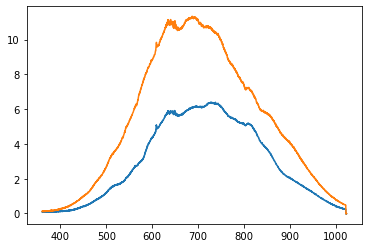

In [7]:
plt.plot(data_0[0,:,0],data_0[0,:,1])
plt.plot(data_1[0,:,0],data_1[0,:,1])
data_0.shape
print(data_0[0,0,0])

### Display the raw data
* Display a pork and chicken sample
* Display the broadband source output

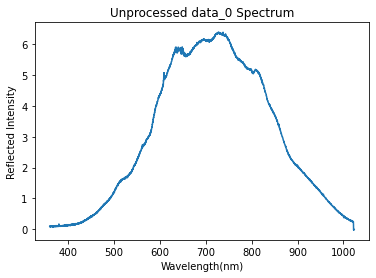

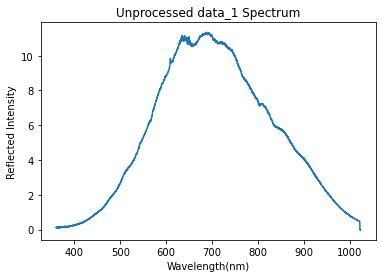

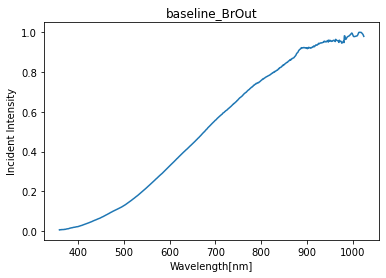

In [81]:
# Displaying all of the spectra to visually inspect results

# GUI.plotall(data_0)
# GUI.plotall(data_1)

# This should be in GUI with all the inputs as parameters
wavelength_start = data_0[0,0,0]
wavelength_end = data_0[0,-1,0]

w = np.linspace(wavelength_start,wavelength_end,len(data_0[1]))
# Display an example of data_0
GUI.plotSpectra(xdata=data_0[0,:,0],ydata=data_0[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Unprocessed data_0 Spectrum')
# Display an example of data_1
GUI.plotSpectra(xdata=data_1[0,:,0], ydata=data_1[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Unprocessed data_1 Spectrum' )
# # Display an example of paper
# GUI.plotSpectra(xdata=baseline_pap[:,1],ydata=baseline_pap[:,0],xlab="Wavelength[nm]",
#             ylab='Reflected Intensity',title='baseline_pap')
# Display an example of broadband output
GUI.plotSpectra(xdata=baseline_BrOut[:,0],ydata=baseline_BrOut[:,1],xlab="Wavelength[nm]",
            ylab='Incident Intensity',title='baseline_BrOut')

In [9]:
# Find a list of the max values in the training set
max_values = []
for i in range(len(data_0[:,0,0])):
    max_values.append(np.max(data_1[i,:,1]))
# Remove all spectra with a max value less then 0.1 and more than 0.99
# plt.plot(max_values)
# print(max_values)
# plt.figure()
# plt.plot(np.transpose(data_0[:,:,1]))

### Preprocessing of the data
* Crop to 360nm to 1024nm
* Normalize (MinMax norm)
* Subtract the normalized broadband output
* Dimensionality reduction
* Max binning?

(36, 2858, 2)


C:\Users\David\AppData\Local\Temp\ipykernel_17788\3502403062.py:32: RuntimeWarning: divide by zero encountered in true_divide
  relative_reflected_light = spectra / baseline


Text(0.5, 1.0, 'Signal with broadband transfer function removed')

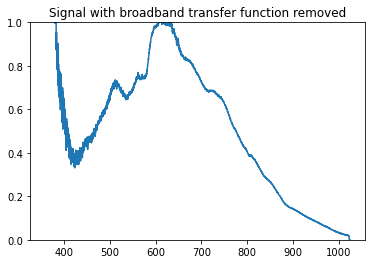

In [90]:
FLAG_Baseline = True
# Load in the baseline 
baseline = baseline_BrOut # --------------------------------- flag
# baseline = baseline_pap[:,:]
baseline = process.normalize(baseline)[:,1]
# plt.plot(baseline)

# Normalize the spectra 

# If we are using the BrOut baseline subtraction
''' 
Find the index of the max within the spectra.
Scale spectra to the corresponding point on baseline
Get the reflectance relative the the baseline
    if perfect reflector then baseline should be all 1s

'''
print(data_0.shape)
# Normalize the peak of the signal to 1. This allows us to find the proportional height above the baseline
data_0_norm = process.normalize(data_0)
if FLAG_Baseline:
    # For each spectra
    for i in range (data_0_norm[:,:,1].shape[0]):
        # Subtract baseline
#         spectra = data_0_norm[i,:,1]
#         diff = spectra-baseline
#         index = np.argmax(diff)
#         # scale spectra such that the greatest overshoot is on the line
#         spectra = spectra * (baseline[index]/spectra[index])
        # Subtract baseline from the spectra
#         relative_reflected_light = 1 - (baseline-spectra) # this doesnt really make any sense
        relative_reflected_light = spectra / baseline
# plt.plot(data_0_norm[35,:,1])
# plt.plot(diff)
# plt.plot(spectra) 
plt.plot(data_0_norm[0,:,0],relative_reflected_light)
plt.ylim([0,1])
plt.title('Signal with broadband transfer function removed')


# # Normalize all data
# data_0_norm = process.normalize(data_0)
# data_0_saved = data_0_norm.copy()
# print('shape:', data_0_norm.shape)
# data_0_norm = process.subtractBaseline(data_0_norm,baseline)
# data_0_norm = process.normalize(data_0_norm)

# data_1_norm = process.normalize(data_1)
# data_1_saved = data_1_norm.copy()
# data_1_norm = process.subtractBaseline(data_1_norm,baseline)
# data_1_norm = process.normalize(data_1_norm)

# print('Size of data_0,', data_0_norm.shape)
# print('Size of data_1,', data_1_norm.shape)


In [72]:
a = [10,20,30]
for x in a:
    x = 0
    
print(a)

[10, 20, 30]


1226


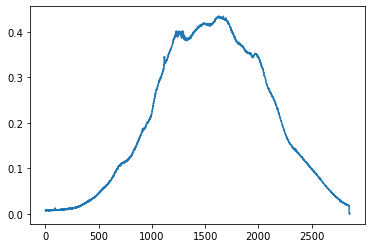

In [53]:
a = [10,20,30]
np.argmax(a)
# Normalize the signal, we want the relative height above the baseline not the absolute. 
data = data_0[0,:,:].copy()
data = process.normalize(data)
spectra = data[:,1]
# spectra = data_0[0,:,1].copy()
# find the point with the greatest overshoot of the baseline
# plt.plot(spectra)
# plt.plot(baseline)
# plt.ylim([0,1])
diff = spectra-baseline
# plt.plot(diff)
index = np.argmax(diff)
print(index)
# scale spectra such that the greatest overshoot is on the line
spectra = spectra * (baseline[index]/spectra[index])

plt.plot(spectra)

In [1]:
# plt.plot(np.transpose(data_0_norm[:,:,1]))
# plt.plot(np.transpose(data_1_norm[:,:,1]))

In [ ]:
# Plots of the normalized spectra
GUI.plotSpectra(xdata=data_0_norm[0,:,0],ydata=data_0_norm[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Normalized data_0 Spectrum' )
GUI.plotSpectra(xdata=data_1_norm[0,:,0],ydata=data_1_norm[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Normalized data_1 Spectrum' )

In [ ]:
# Plotting all of the normalized results after baseline subtraction
# plotall(B_norm)
# plotall(C_norm)
# plotall(P_norm)
# plotall(T_norm)

# Plot the averages of each 
# print(B_norm.shape)

# plt.figure()
# plt.plot(np.mean(B_norm,axis=0))
# plt.plot(np.mean(C_norm,axis=0))
# plt.plot(np.mean(P_norm,axis=0))
# plt.plot(np.mean(T_norm,axis=0))
# plt.legend(['B','C','P','T'])
# xtemp = [[1,1],[2,2],[3,3],[4,4],[5,5]]
# np.mean(B_norm,axis=0)

# Training and Testing

### Stratify data

In [ ]:
# This function takes in the beef,chicken,pork, and turkey data
def stratdata(class0,class1,case):
    # Break each into 
    c0_1,c0_2,c0_3,c0_4 = chunkData6by6(class0)
    c1_1,c1_2,c1_3,c1_4 = chunkData6by6(class1)
    
    d1 = np.concatenate([c0_1,c1_1])
    d2 = np.concatenate([c0_2,c1_2])
    d3 = np.concatenate([c0_3,c1_3])
    d4 = np.concatenate([c0_4,c1_4])
    
    # implement a switch-case
    if case == 1:
        train = np.concatenate([d1,d2])
        val   = d3
        test  = d4
    elif case == 2:
        train = np.concatenate([d1,d3])
        val   = d2
        test  = d4
    elif case == 3:
        train = np.concatenate([d2,d3])
        val   = d1
        test  = d4
    elif case == 4:
        train = np.concatenate([d1,d2])
        val   = d4
        test  = d3
    elif case == 5:
        train = np.concatenate([d1,d4])
        val   = d2
        test  = d3
    elif case == 6:
        train = np.concatenate([d2,d4])
        val   = d1
        test  = d3
    elif case == 7:
        train = np.concatenate([d1,d4])
        val   = d3
        test  = d2
    elif case == 8:
        train = np.concatenate([d1,d3])
        val   = d4
        test  = d2
    elif case == 9:
        train = np.concatenate([d4,d3])
        val   = d1
        test  = d2
    elif case == 10:
        train = np.concatenate([d2,d4])
        val   = d3
        test  = d1
    elif case == 11:
        train = np.concatenate([d3,d4])
        val   = d2
        test  = d1
    elif case == 12:
        train = np.concatenate([d2,d3])
        val   = d4
        test  = d1
    else:
        print("Invalid case selected!")
    
    return train,val,test

# Breaks the data into 4 corner chunks
def chunkData6by6(data):    
    data = data.copy()
    d1 = data[[0,1,2,6,7,8,12,13,14]]
    d2 = data[[3,4,5,9,10,11,15,16,17]]
    d3 = data[[18,19,20,24,25,26,30,31,32]]
    d4 = data[[21,22,23,27,28,29,33,34,35]]
    return d1,d2,d3,d4

# This function simply breaks the data into 4 chunks based on the number of samples
def chunkDataSimple(dataIn):
    data = dataIn.copy()
    # Get the length of the data
    length = data.shape[0]
    # Break the data into 4 chunks of equal length
    d1 = data[0:int(length/4)]
    d2 = data[int(length/4):int(length/2)]
    d3 = data[int(length/2):int(3*length/4)]
    d4 = data[int(3*length/4):length]     
    return d1,d2,d3,d4
    

#X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,1)
#y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,1)

In [ ]:
# plt.plot(np.transpose(data_0_norm[:,:,1]))
# plt.plot(np.transpose(data_1_norm[:,:,1]))

print(data_0_norm.shape)
print(labels_0.shape)
print(data_1_norm.shape)
print(labels_1.shape)


### Train ML models

In [ ]:
# This is revamped to just train the classifier and save it
import sklearn
print("sklearn version: ",sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score

inferenceFlag = False 
# if the model is being trained for inference in 3D slicer, use all the data
if inferenceFlag is True:
    X_train = np.concatenate([data_0_norm[:,:,1],data_1_norm[:,:,1]])
    y_train = np.concatenate([labels_0,labels_1])

    # Instantiate the model
    modelKNN = KNeighborsClassifier(n_neighbors=3)

    # Train the model
    modelKNN.fit(X_train,y_train)

    # Save the model to file
    from joblib import dump, load
    dump(modelKNN, 'Models/KNN_faketrails.joblib') 

In [ ]:
# GUI
import seaborn as sns
def fancyConfusionMatrix(cf_matrix, classifierName):
    # ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, fmt='.2%',cmap='Blues')
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1), annot=True, cmap='Blues')
    sns.set(font_scale=2)
    titleFontSize = 20
    ax.set_title(classifierName+' Confusion Matrix',fontsize=titleFontSize)
    ax.set_xlabel('\nPredicted Values', fontsize=titleFontSize)
    ax.set_ylabel('Actual Values', fontsize=titleFontSize)

    # Ticket labels - List must be in alphabetical order
    tickFontSize = 16
    ax.xaxis.set_ticklabels(['Beef', 'Pork'], fontsize=tickFontSize)
    ax.yaxis.set_ticklabels(['Beef', 'Pork'], fontsize=tickFontSize)

    # Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
cf_matrix
np.sum(cf_matrix, axis=1)

In [ ]:
# Training of the KNN
F1s = []
Accs = []
cf_matrix = 0

# if the model is being tested then stratify the data into train, test, split
if inferenceFlag is False:
    for i in range(1,13):
        X_train, X_val, X_test = stratdata(data_0_norm[:,:,1],data_1_norm[:,:,1],case=i)
        y_train, y_val, y_test = stratdata(labels_0,labels_1,case=i)
        # Combine training and validation as there is no validation
        X_train = np.concatenate([X_train,X_val])
        y_train = np.concatenate([y_train,y_val])
        # Instantiate the model
        modelKNN = KNeighborsClassifier(n_neighbors=3)
        # Train the model
        modelKNN.fit(X_train,y_train)
        # Test the model
        predicted = modelKNN.predict(X_test)       
        F1s.append(f1_score(y_test,predicted,average='weighted'))
        Accs.append(accuracy_score(y_test,predicted))
        cf_matrix += confusion_matrix(y_test, predicted)
    
#     print(cf_matrix/sum(cf_matrix)) 
    fancyConfusionMatrix(cf_matrix,'kNN')
    print(cf_matrix)
#     plt.figure()
#     plt.plot(np.transpose(X_train))
    print('F1s', F1s)
    print('The mean f1 score is: ',np.mean(F1s))
    print('The mean accuracy is: ',np.mean(Accs))

In [ ]:
# Training of the SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score

F1s = []
Accs = []
cf_matrix = 0
# if the model is being tested then stratify the data into train, test, split
if inferenceFlag is False:
    for i in range(1,13):
        X_train, X_val, X_test = stratdata(data_0_norm[:,:,1],data_1_norm[:,:,1],case=i)
        y_train, y_val, y_test = stratdata(labels_0,labels_1,case=i)
        # Combine training and validation as there is no validation
        X_train = np.concatenate([X_train,X_val])
        y_train = np.concatenate([y_train,y_val])
        # Instantiate the model
        modelSVM = SVC()
        # Train the model
        modelSVM.fit(X_train,y_train)
        # Test the model
        predicted = modelSVM.predict(X_val) 
        F1s.append(f1_score(y_test,predicted,average='weighted'))
        Accs.append(accuracy_score(y_test,predicted))
        cf_matrix += confusion_matrix(y_test, predicted)
        
    fancyConfusionMatrix(cf_matrix, 'SVM')
#     print(cf_matrix/sum(cf_matrix))    
#     plt.figure()
#     plt.plot(np.transpose(X_train))
    print('F1s', F1s)
    print('The mean f1 score is: ',np.mean(F1s))
    print('The mean accuracy is: ',np.mean(Accs))


In [ ]:
### Used for producing SPIE figure

# # load('Models/KNN_PorkVsBeefTest.joblib')
# import seaborn as sns
# import sklearn
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score
# from random import Random

# # ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, fmt='.2%',cmap='Blues')
# green = 0*np.ones(223)
# red   = 1*np.ones(191)
# y_test = np.concatenate([green,red])

# TN = 0*np.ones(205)
# FP = 1*np.ones(18)
# TP = 1*np.ones(182)
# FN = 0*np.ones(9)
# predicted = np.concatenate([TN,FP,TP,FN])

# cf_matrix = confusion_matrix(y_test, predicted)

# ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, cmap='Blues')
# # ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')


# # ax.set_title('kNN Confusion Matrix');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Pork','Beef'])
# ax.yaxis.set_ticklabels(['Pork','Beef'])

# # ax.xaxis.set_ticklabels(['False','True'])
# # ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

# plt.savefig('ConfusionMatrix_KNN_PorkVsBeefTest.png')